In [1]:
import json
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from IPython.display import clear_output

In [2]:
from helper_functions import display_predictions, remove_dataset_on_disk
from model_vit import VisionTransformer

# Statistics

In [3]:
with open("saved_models/model_stats.json", "r") as file:
    stats = json.load(file)

In [4]:
train_losses = stats["train_losses"]
test_losses = stats["test_losses"]
train_accuracies = stats["train_accuracies"]
test_accuracies = stats["test_accuracies"]
epochs = range(1, len(train_losses) + 1)

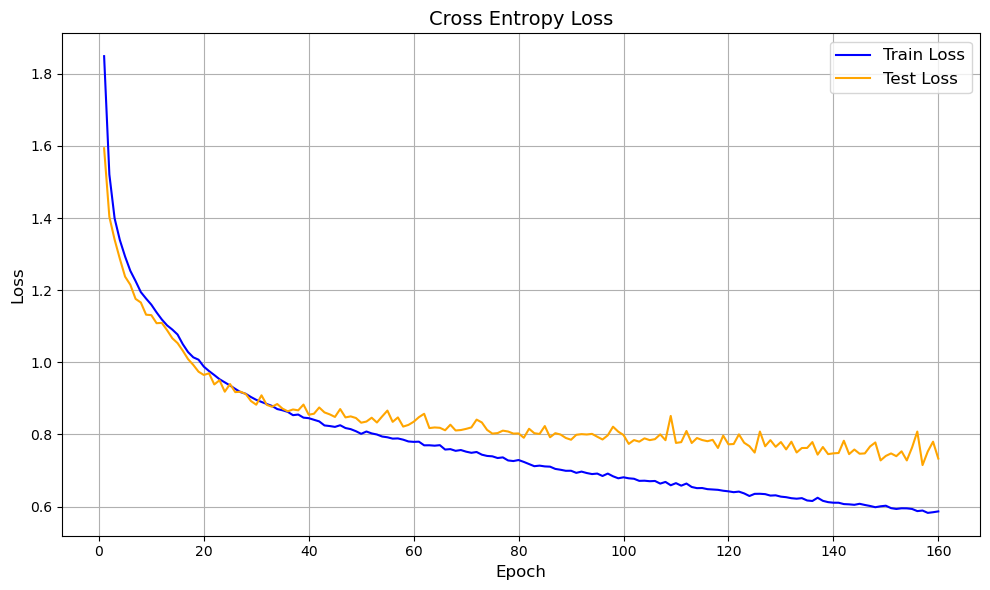

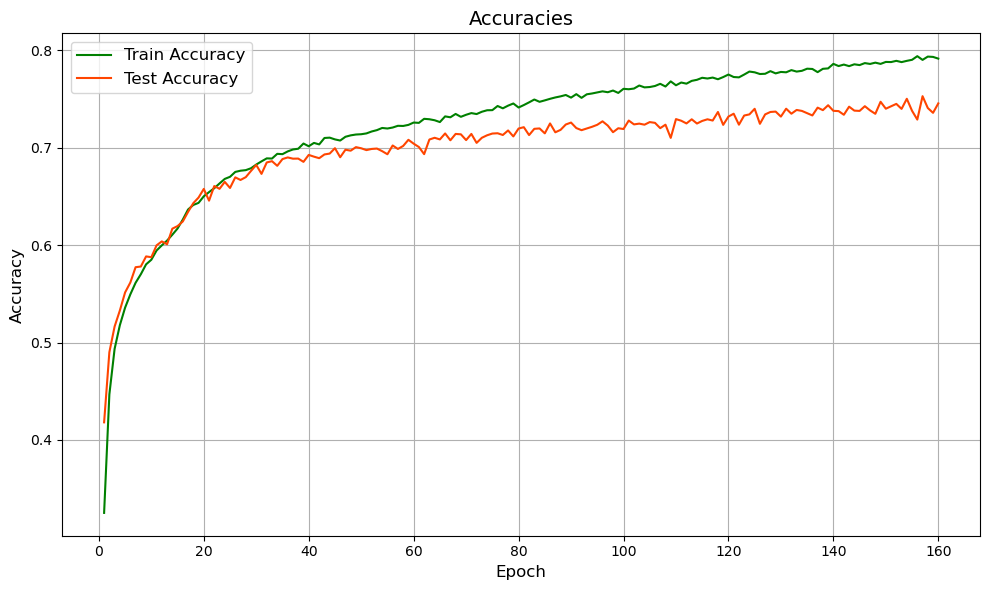

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label="Train Loss", color="blue")
plt.plot(epochs, test_losses, label="Test Loss", color="orange")
plt.title("Cross Entropy Loss", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracies, label="Train Accuracy", color="green")
plt.plot(epochs, test_accuracies, label="Test Accuracy", color="orangered")
plt.title("Accuracies", fontsize=14)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Classification examples

In [6]:
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_dataset = datasets.CIFAR10(root='./data', train=False, download=False, transform=transform_test)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [7]:
classes = test_dataset.classes
device = torch.device("mps")

In [8]:
model = VisionTransformer(
    image_size=32,
    patch_size=4,
    emb_input_channels_size=3,
    embedding_size=256,
    num_transformers=6,
    hidden_layer_dim_transformer=512,
    num_heads=8,
    num_classes=10,
    dropout_rate=0.2
)

In [9]:
model.to(device)
clear_output()

In [10]:
checkpoint_path = "saved_models/model_epoch_160.pt"
model.load_state_dict(torch.load(checkpoint_path, map_location=device))
model.eval()
clear_output()

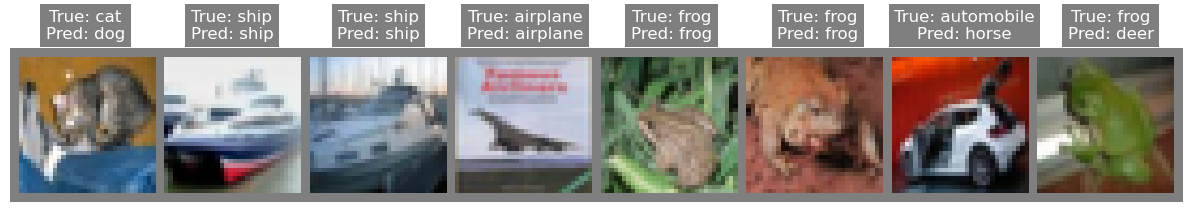

True label: cat, Predicted: dog
True label: ship, Predicted: ship
True label: ship, Predicted: ship
True label: airplane, Predicted: airplane
True label: frog, Predicted: frog
True label: frog, Predicted: frog
True label: automobile, Predicted: horse
True label: frog, Predicted: deer


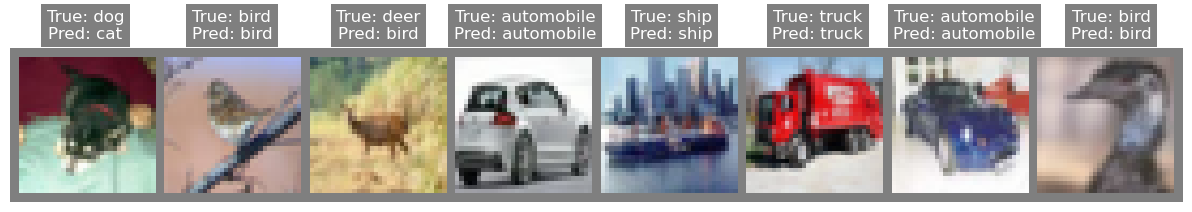

True label: dog, Predicted: cat
True label: bird, Predicted: bird
True label: deer, Predicted: bird
True label: automobile, Predicted: automobile
True label: ship, Predicted: ship
True label: truck, Predicted: truck
True label: automobile, Predicted: automobile
True label: bird, Predicted: bird


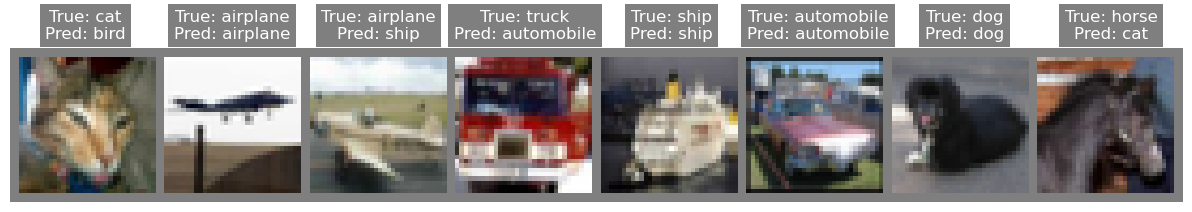

True label: cat, Predicted: bird
True label: airplane, Predicted: airplane
True label: airplane, Predicted: ship
True label: truck, Predicted: automobile
True label: ship, Predicted: ship
True label: automobile, Predicted: automobile
True label: dog, Predicted: dog
True label: horse, Predicted: cat


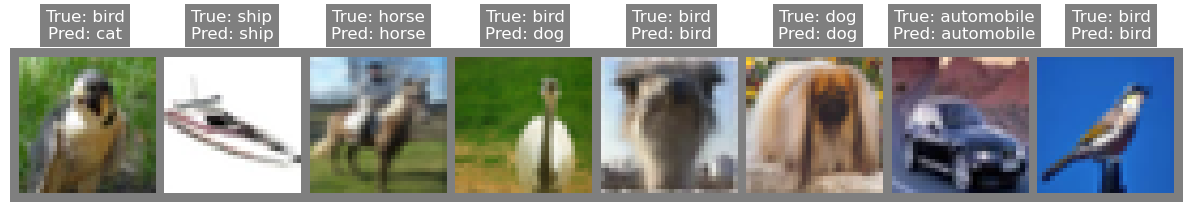

True label: bird, Predicted: cat
True label: ship, Predicted: ship
True label: horse, Predicted: horse
True label: bird, Predicted: dog
True label: bird, Predicted: bird
True label: dog, Predicted: dog
True label: automobile, Predicted: automobile
True label: bird, Predicted: bird


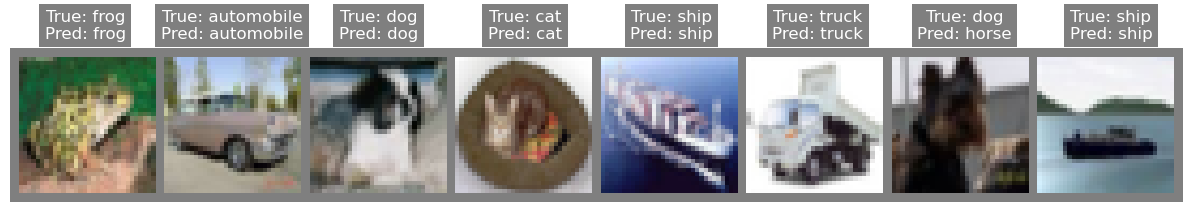

True label: frog, Predicted: frog
True label: automobile, Predicted: automobile
True label: dog, Predicted: dog
True label: cat, Predicted: cat
True label: ship, Predicted: ship
True label: truck, Predicted: truck
True label: dog, Predicted: horse
True label: ship, Predicted: ship


In [11]:
display_predictions(model, test_loader, classes, device, num_sample_rows=5)

In [12]:
remove_dataset_on_disk()

Removing 'data' folder
